In [1]:
import pandas as pd

In [2]:
nifty = pd.read_csv("NIFTY 50.csv")
nifty

,Date,Open,High,Low,Close,Shares Traded,Turnover (₹ Cr)
0,06-NOV-2023,19345.85,19423.00,19309.70,19411.75,180690631.0,16296.56
1,07-NOV-2023,19404.05,19423.50,19329.10,19406.70,198660124.0,18288.06
2,08-NOV-2023,19449.60,19464.40,19401.50,19443.50,194967997.0,17060.45
3,09-NOV-2023,19457.40,19463.90,19378.35,19395.30,208418472.0,19087.29
4,10-NOV-2023,19351.85,19451.30,19329.45,19425.35,152215785.0,12916.21
...,...,...,...,...,...,...,...
244,29-OCT-2024,24328.85,24484.50,24140.85,24466.85,332044690.0,35579.48
245,30-OCT-2024,24371.45,24498.20,24307.30,24340.85,285196335.0,31068.70
246,31-OCT-2024,24349.85,24372.45,24172.60,24205.35,287007588.0,33403.89
247,01-NOV-2024,24302.75,24368.25,24280.20,24304.35,38811387.0,3348.45


In [3]:
nifty.columns

Index(['Date ', 'Open ', 'High ', 'Low ', 'Close ', 'Shares Traded ',
       'Turnover (₹ Cr)'],
      dtype='object')

In [4]:
nifty = nifty[["Open ","High ","Low ","Close ", "Shares Traded ", "Turnover (₹ Cr)"]]

In [5]:
nifty.corr()["Turnover (₹ Cr)"]

Open               0.240574
High               0.255833
Low                0.202163
Close              0.230041
Shares Traded      0.937604
Turnover (₹ Cr)    1.000000
Name: Turnover (₹ Cr), dtype: float64

In [6]:
import seaborn as sns

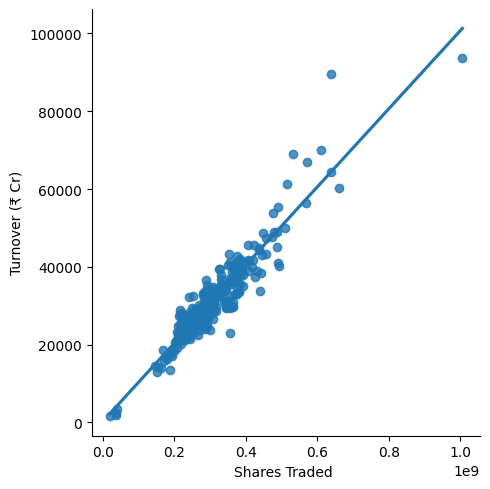

In [7]:
sns.lmplot(x="Shares Traded ", y= "Turnover (₹ Cr)", data= nifty, fit_reg= True, ci= None)

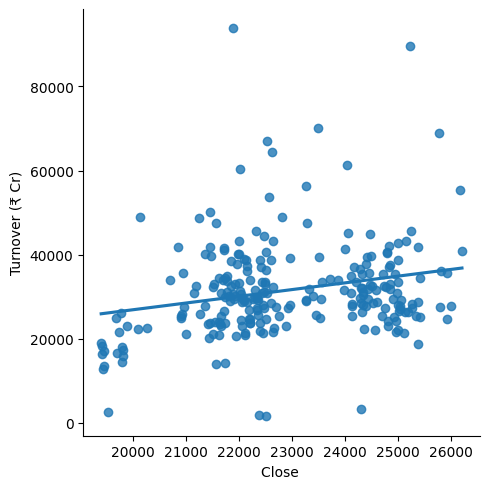

In [8]:
sns.lmplot(x="Close ", y="Turnover (₹ Cr)", data= nifty, fit_reg=True, ci= None)

<Axes: ylabel='Frequency'>

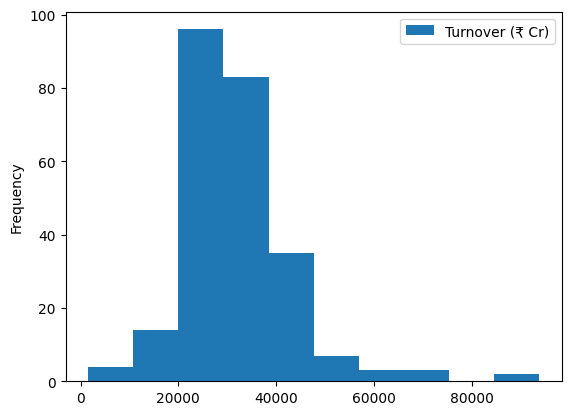

In [9]:
nifty.plot.hist(y="Turnover (₹ Cr)")

In [10]:
nifty[nifty.isnull().any(axis=1)]

,Open,High,Low,Close,Shares Traded,Turnover (₹ Cr)
174,24853.80,24854.80,24508.15,24530.90,NaN,NaN
248,24315.75,24316.75,23816.15,23995.35,NaN,NaN


In [11]:
nifty=nifty.dropna()
nifty

,Open,High,Low,Close,Shares Traded,Turnover (₹ Cr)
0,19345.85,19423.00,19309.70,19411.75,180690631.0,16296.56
1,19404.05,19423.50,19329.10,19406.70,198660124.0,18288.06
2,19449.60,19464.40,19401.50,19443.50,194967997.0,17060.45
3,19457.40,19463.90,19378.35,19395.30,208418472.0,19087.29
4,19351.85,19451.30,19329.45,19425.35,152215785.0,12916.21
...,...,...,...,...,...,...
243,24251.10,24492.60,24134.90,24339.15,278562235.0,28136.06
244,24328.85,24484.50,24140.85,24466.85,332044690.0,35579.48
245,24371.45,24498.20,24307.30,24340.85,285196335.0,31068.70
246,24349.85,24372.45,24172.60,24205.35,287007588.0,33403.89


In [12]:
train=nifty.iloc[0:198].copy()
test=nifty.iloc[198:247].copy()

In [13]:
train.shape



(198, 6)

In [16]:
test.shape

(49, 6)

In [23]:
!pip install scikit-learn


In [24]:
from sklearn.linear_model import LinearRegression

reg= LinearRegression()


In [25]:
predictors=["Shares Traded "]
target= ["Turnover (₹ Cr) "]

In [29]:
reg.fit(train[predictors], train["Turnover (₹ Cr)"])

LinearRegression()

In [30]:
predictions = reg.predict(test[predictors])
predictions

array([20881.02989638, 22157.38453162, 21871.75161433, 34905.85137131,
       62635.1796762 , 22105.53216716, 21063.06064058, 25127.8800063 ,
       22049.61669878, 30776.0965031 , 25184.35411609, 24882.59505072,
       27610.36585514, 37450.30475107, 24834.49782995, 16824.50516036,
       21436.29624078, 21413.88140039, 31048.28484868, 52379.71792763,
       20775.77111974, 37845.05004618, 27543.20847229, 36555.09520028,
       48209.66203335, 36991.81100548, 24506.81565609, 41677.96413781,
       36947.2979695 , 36891.77476985, 32878.75439272, 28716.2941677 ,
       25867.16488253, 20900.18090478, 20506.01854833, 25463.57919677,
       22491.8687624 , 25027.09631333, 28744.84079289, 23975.51312569,
       27635.2964847 , 28130.22584807, 21507.48677071, 36725.54055091,
       27545.28330067, 32764.06311433, 28192.63404703, 28369.37482294,
        4150.5665501 ])

In [31]:
test["predictions"]= predictions
test

,Open,High,Low,Close,Shares Traded,Turnover (₹ Cr),predictions
199,24906.10,25043.80,24874.70,25010.60,210266456.0,22166.86,20881.029896
200,25024.80,25073.10,24973.65,25017.75,223346636.0,26695.00,22157.384532
201,25030.80,25129.60,24964.65,25052.35,220419448.0,26994.19,21871.751614
202,25035.30,25192.90,24998.50,25151.95,353993900.0,43221.73,34905.851371
203,25249.70,25268.35,25199.40,25235.90,638166179.0,89554.91,62635.179676
204,25333.60,25333.65,25235.50,25278.70,222815249.0,28187.71,22105.532167
205,25313.40,25321.70,25235.80,25279.85,212131921.0,27276.14,21063.060641
206,25089.95,25216.00,25083.80,25198.70,253788501.0,26293.35,25127.880006
207,25250.50,25275.45,25127.75,25145.10,222242223.0,26272.38,22049.616699
208,25093.70,25168.75,24801.30,24852.15,311671856.0,33001.17,30776.096503


In [33]:
test.loc[test["predictions"]<0, "predictions"]=0
test["predictions"]= test["predictions"].round()
test

,Open,High,Low,Close,Shares Traded,Turnover (₹ Cr),predictions
199,24906.10,25043.80,24874.70,25010.60,210266456.0,22166.86,20881.0
200,25024.80,25073.10,24973.65,25017.75,223346636.0,26695.00,22157.0
201,25030.80,25129.60,24964.65,25052.35,220419448.0,26994.19,21872.0
202,25035.30,25192.90,24998.50,25151.95,353993900.0,43221.73,34906.0
203,25249.70,25268.35,25199.40,25235.90,638166179.0,89554.91,62635.0
204,25333.60,25333.65,25235.50,25278.70,222815249.0,28187.71,22106.0
205,25313.40,25321.70,25235.80,25279.85,212131921.0,27276.14,21063.0
206,25089.95,25216.00,25083.80,25198.70,253788501.0,26293.35,25128.0
207,25250.50,25275.45,25127.75,25145.10,222242223.0,26272.38,22050.0
208,25093.70,25168.75,24801.30,24852.15,311671856.0,33001.17,30776.0


In [35]:
from sklearn.metrics import mean_absolute_error
error= mean_absolute_error(test["Turnover (₹ Cr)"], test["predictions"])


In [36]:
error

4138.251428571429

In [37]:
nifty.describe()["Turnover (₹ Cr)"]

count      247.000000
mean     31554.140648
std      11523.649115
min       1572.770000
25%      25230.555000
50%      29741.390000
75%      35841.410000
max      93786.440000
Name: Turnover (₹ Cr), dtype: float64

In [40]:
errors= (test["Turnover (₹ Cr)"]-test["predictions"]).abs()

In [41]:
errors

199     1285.86
200     4538.00
201     5122.19
202     8315.73
203    26919.91
204     6081.71
205     6213.14
206     1165.35
207     4222.38
208     2225.17
209        3.72
210     2963.31
211     1785.73
212     4297.91
213      696.69
214     1880.01
215     3844.83
216     7418.00
217     3341.27
218    16535.27
219     4049.74
220     2271.37
221      325.08
222     4283.36
223     7210.63
224      963.94
225     2966.29
226     4011.50
227     5772.71
228     3658.24
229      614.36
230     2161.63
231     2179.45
232      834.97
233      764.90
234     3649.88
235     1623.83
236     7579.34
237     3027.76
238     8231.22
239     5166.59
240     3798.10
241     6310.66
242      342.91
243      591.06
244     2815.48
245     2875.70
246     5034.89
247      802.55
dtype: float64

In [42]:
clf=LinearRegression()
clf.fit(train[predictors], train["Turnover (₹ Cr)"])


LinearRegression()

In [44]:
import pickle
pickle.dump(clf, open('model.pkl', 'wb'))